In [3]:
#carga de libreria
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import levene

#1 leer archivo
games=pd.read_csv('games.csv')
games.info() # obtener informacon general de dataset
print('\n')
print(games.describe()) #Tener una informacion estadisticas de los datos del dataset
print('\n')
print('\n')
print(games.isnull().sum())#Cuantificar los valores nulos de las columnas.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.81360

In [4]:

print('\n')
print('\n')
    #2.1 Reemplaza los nombres de las columnas (ponlos en minúsculas).
games.columns= games.columns.str.lower() #convertir las columnas en minusculas
print('\n')

    #2.2 Convertir tipos de datos.
    #limpieza y transformacion de la columna de year de lanzamiento:

games= games.dropna(subset=['year_of_release'])#Eliminar valores nulos de la columna year_of_release
games['year_of_release']=games['year_of_release'].astype(int)




##Comentario:Se eliminaron los valores nulos ya que no se podia convertir los datos de la columnas, lo cuales son necesarios convertir para futuro analisis . Ademas, estos datos nulos no son utiles para responder las preguntas relacionadas con el tiempo. Ademas, se cambio el tipo de dato a enteros para mayor manejo de los valores en futuras operaciones.

In [5]:
#limpienza y transformacion de la columna user_score
games['user_score']=pd.to_numeric(games['user_score'], errors='coerce') #convertir tipo de datos de str a float 
games = games.dropna(subset=['user_score'])



##Comentario: En la columna critica de usuario se encontraban datos como 'tbd' lo que puedo intuir que al momento de extraer el dataset aun no estaba disponible el puntuaje de los usuario ya sea por error o que el dataset  fue recolectado antes de la puntuacion. No son valores nulos pero se sustituyeron como NaN para convertir el tipo de dato en float ya que los datos contienen puntuacion numerica decimal.Ademas, decidi eliminar los valores nulos ya que usaremos los datos de esta columna para analisis y estadistica que necesitan operaciones sin errores.

In [6]:

    #Limpienza y transformacion de la columna critic_score
games= games.dropna(subset=['critic_score'])#Eliminar valores nulos



##Comentario:Se eliminaron los valores nulos de la columna ya que usaremos los datos en futuros analisis correlativos y para evitar distorsiones estadistica es preferible eliminar NaN.

In [7]:

    #Limpieza y transformacion de la columna Rating
games['rating']=games['rating'].fillna('sin clasificacion')



##Comentario: Se sustituyeron los valores NaN para conservar los daton y tratarlos con una categoria.

  

In [8]:
  #Calcular ventas totatels
games['total_sales']= games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

games.info()
display(games.head())
print('\n')



<class 'pandas.core.frame.DataFrame'>
Index: 6894 entries, 0 to 16705
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6894 non-null   object 
 1   platform         6894 non-null   object 
 2   year_of_release  6894 non-null   int64  
 3   genre            6894 non-null   object 
 4   na_sales         6894 non-null   float64
 5   eu_sales         6894 non-null   float64
 6   jp_sales         6894 non-null   float64
 7   other_sales      6894 non-null   float64
 8   critic_score     6894 non-null   float64
 9   user_score       6894 non-null   float64
 10  rating           6894 non-null   object 
 11  total_sales      6894 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 700.2+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


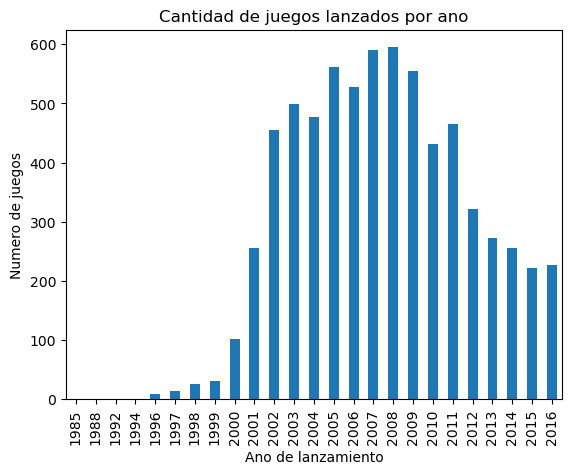

In [9]:


    #3.1 Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
games['year_of_release'].value_counts().sort_index().plot(kind='bar',xlabel= 'Ano de lanzamiento', ylabel='Numero de juegos',title='Cantidad de juegos lanzados por ano')
plt.show()



##Comentario: Se observa que a partir del 2000 hay un auge en la catidad de videojuegos lanzados.En el 2007 y 2008 alcanza su punto maximo. Y se observa que hay un descenso desde el 2011 hasta el 2016


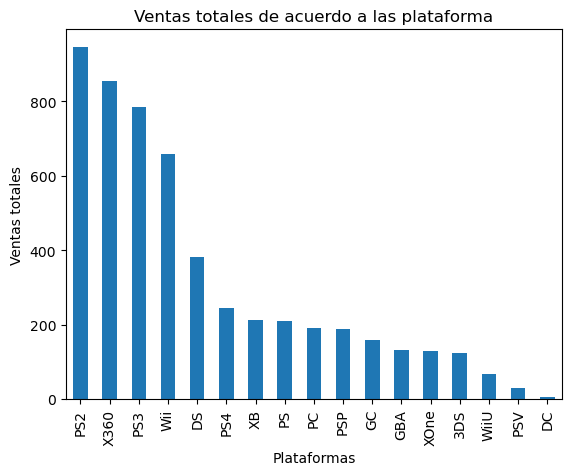

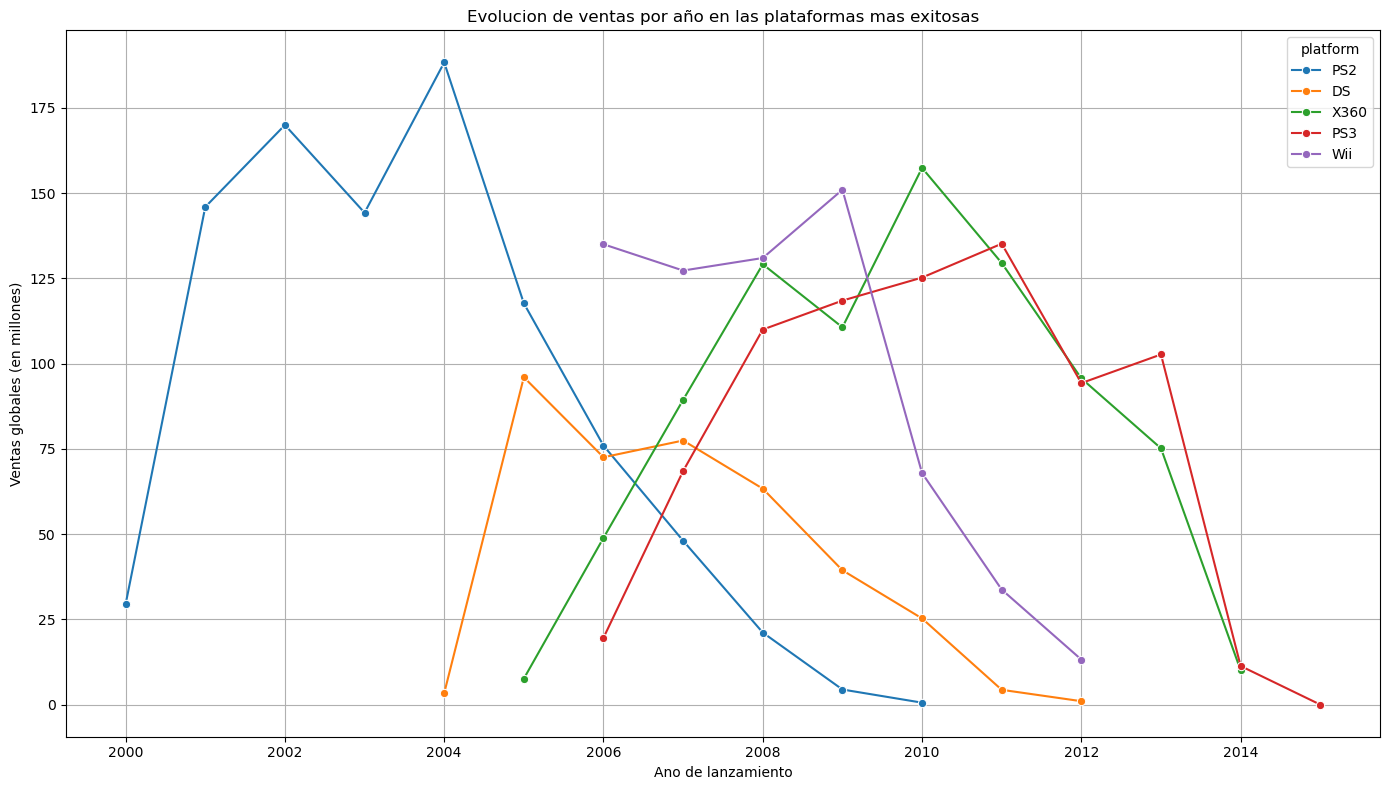



Dataset que muestra el tiempo de vida de las plataformas: 
            min   max  duracion
platform                      
PC        1985  2016        31
PS2       2000  2010        10
X360      2005  2014         9
PS3       2006  2015         9
PSP       2004  2013         9
PS        1994  2002         8
DS        2004  2012         8
XB        2000  2007         7
GC        2001  2007         6
Wii       2006  2012         6
3DS       2011  2016         5
PSV       2011  2016         5
GBA       2001  2006         5
WiiU      2012  2016         4
PS4       2013  2016         3
XOne      2013  2016         3
DC        1999  2001         2


Cuales son las plataformas que antes era populares ya hora no tienen ventas: 
 platform
PS2     946.01
X360    853.67
PS3     785.44
Wii     659.23
DS      382.88
XB      212.22
PS      209.98
PSP     187.68
GC      159.25
GBA     131.70
DC        4.55
Name: total_sales, dtype: float64




In [10]:
    #3.2 Ventas totales de acuerdo a la plataforma
sales_per_platform = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

#grafico
sales_per_platform.plot(kind='bar',ylabel='Ventas totales',xlabel='Plataformas',title='Ventas totales de acuerdo a las plataforma')
plt.show()

#Elegir las 5 primeras plataformas con mas ventas
top_platforms = sales_per_platform.iloc[:5].index # obtener los nombres: indexacion de serie
games_top_platform = games[games['platform'].isin(top_platforms)]#filtrar el dataset original

#distribucion de ventas por ano y plataforma (las primeras top)
sales_per_year_top = games_top_platform.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()

#grafico
plt.figure(figsize=(14, 8))
sns.lineplot(data=sales_per_year_top, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.title('Evolucion de ventas por año en las plataformas mas exitosas')
plt.xlabel('Ano de lanzamiento')
plt.ylabel('Ventas globales (en millones)')
plt.grid(True)
plt.tight_layout()
plt.show()
print('\n')

#Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

#Cuanto tardan en aparecer y desaparecer las plataformas
time_platform = games.groupby('platform')['year_of_release'].agg(['min', 'max'])
time_platform['duracion'] = time_platform['max'] - time_platform['min']
time_platform = time_platform.sort_values(by='duracion', ascending=False)
print(f'Dataset que muestra el tiempo de vida de las plataformas: \n {time_platform}')

print('\n')

dead_platform = time_platform[time_platform['max'] < 2016].index
dead_popular_platforms = sales_per_platform[sales_per_platform.index.isin(dead_platform)].sort_values(ascending=False)
print(f'Cuales son las plataformas que antes era populares ya hora no tienen ventas: \n {dead_popular_platforms}')

print('\n')


##Comentario:Se identificaron las plataformas PS2, X360 y PS3 con grandes venta totales que ya no registran actividades. Se observa en el grafico del evolucion de ventas por ano segun las plataformas mas exitosas que alzanza su pico comercial en dos anos despues de su lanzamiento y luego disminuye hasta desaparecer. De acuerto a la tabla del tiempo de vida de las plataformas el promedio es de 6 a 10 anos.

    #3.3Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
#Comentario: Se considero tomar los datos a partir del 2000 hasta el 2016 debido a que presentan mayor volumen de datos ademas de consistencia en sus registros tomados en cuenta en el grafico de cantidad de juegos lanzados por ano.

   

In [11]:
 #3.4Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

df_important =games[games['year_of_release'] >= 2000]
  

##Comentario: Para trabajar en futuras operaciones y estadisticas filtramos el daatset original a traves de de una operacion logica que indica que los datos relevantes vamos a tomarlos del lanzamiento del juego a partir del 2000

A continuancion estas son las plataformas lideres en venta :
 platform
PS2     946.01
X360    853.67
PS3     785.44
Wii     659.23
DS      382.88
Name: total_sales, dtype: float64






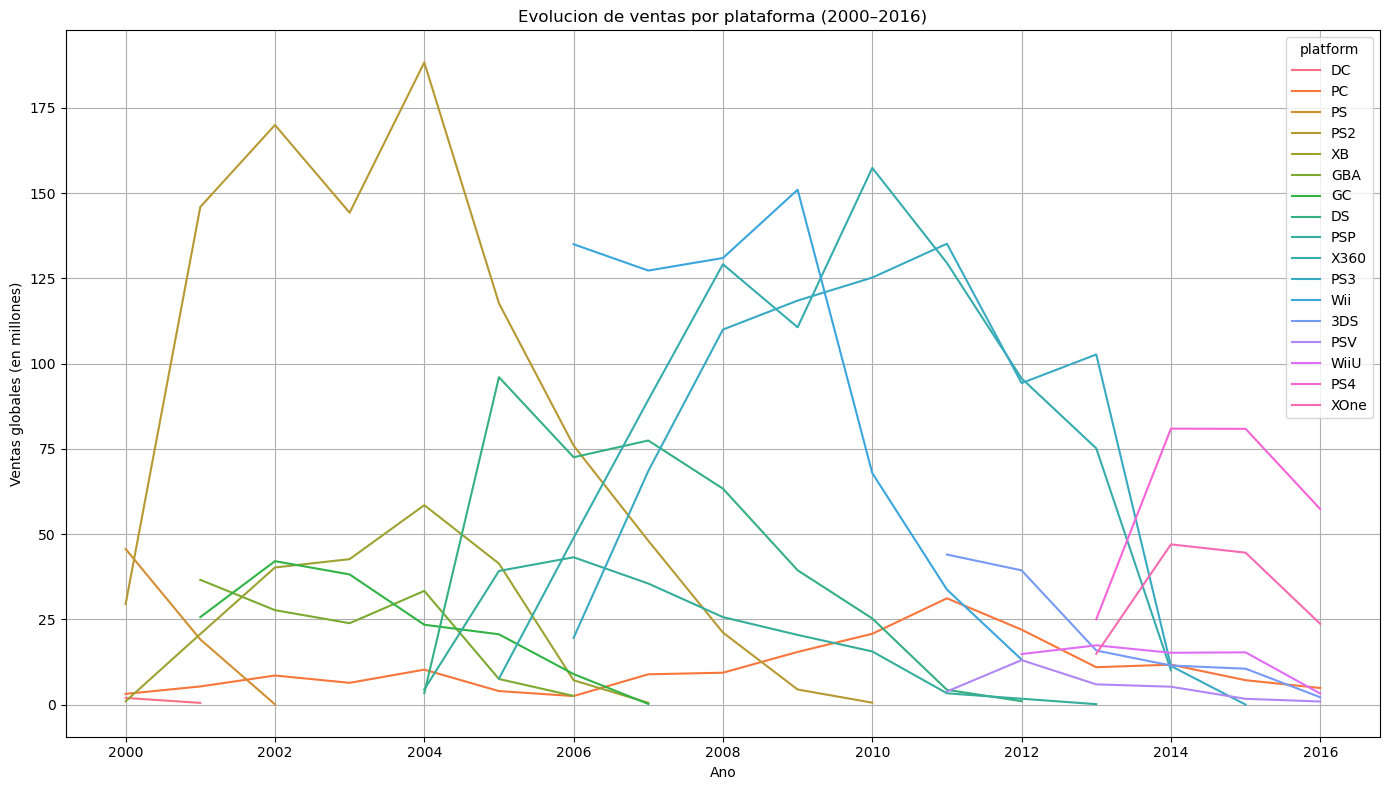

Plataformas que siguen activas y tiene potecial comercial: 
 platform
PS4     138.25
XOne     68.28
WiiU     18.61
3DS      12.72
PC       12.07
Name: total_sales, dtype: float64




In [12]:
  #3.5¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

#Las tops
sales_liders = df_important.groupby('platform')['total_sales'].sum().sort_values(ascending=False) #agrupamos para saber cuales son las plataformas lideres en venta  tomando en cuenta valores a partir del 2000. Nota:ordenamos con el parametro ascending para observar facilmente las tops de mayor a menor
top_platforms = sales_liders.head() 
print(f'A continuancion estas son las plataformas lideres en venta :\n {top_platforms}')
print('\n')
print('\n')

#Ptaformas aumentan-bajan
sales_important = df_important.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index() #Tomar los datos a partir del 2000 para ver como aumenta y caen las plataformas

#grafico
plt.figure(figsize=(14, 8))
sns.lineplot(data=sales_important, x='year_of_release', y='total_sales', hue='platform')
plt.title('Evolucion de ventas por plataforma (2000–2016)')
plt.xlabel('Ano')
plt.ylabel('Ventas globales (en millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

#Elegir
last_period= df_important[df_important['year_of_release'] >= 2015] # saber cuales son pontencialmente rentables para el 2017 tomaremos el ultimo periodo 2015-2016. Filtramos nuevamente a tarves de indexacion logica
sales_final = last_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False) # Al agrupar la variable por plataforma y venta totales obtenemos los valores del ultimo periodo 
print(f'Plataformas que siguen activas y tiene potecial comercial: \n {sales_final.head()}')
print('\n')

 

##Comentario: Se observaron que las tres primeras plataformas lideres en venta entre el 2000-2016 fueron : PS2, X360 y PS3. Sin embargo, estas tres primeras ya no tienen actividad para el ultimo periodo anual (2015-2016) por lo tanto tuvimos que filtrar nuevamente. Por lo tanto, obtuvimos que  PS4, Xbox One, 3DS y PC mantienen actividad reciente y crecimiento sostenido, por lo que se consideran potencialmente rentables para proyectar el comportamiento del mercado en 2017.

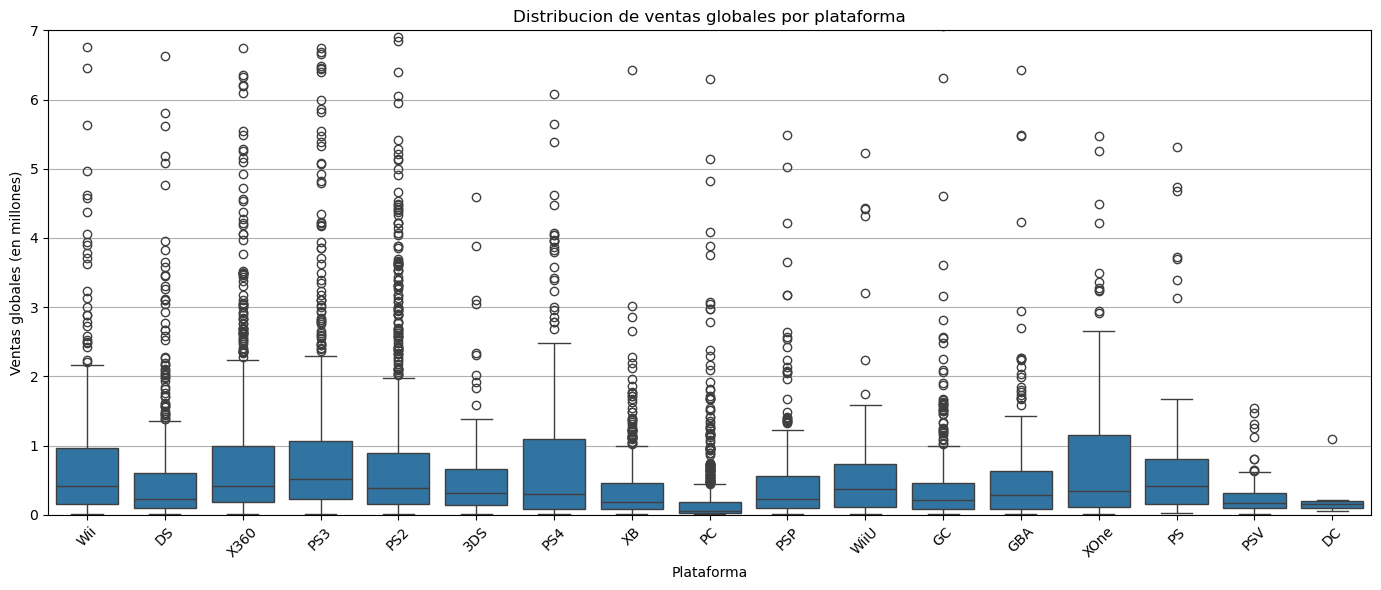





Promedio de  ventas de las plataformas:platform
Wii     1.373396
PS3     1.013471
X360    0.991487
PS4     0.981004
PS2     0.829833
DS      0.823398
3DS     0.791795
XOne    0.789152
PS      0.763647
WiiU    0.742472
GBA     0.555696
PSP     0.481231
GC      0.457615
XB      0.374947
PC      0.270030
PSV     0.261271
DC      0.228182
Name: total_sales, dtype: float64






In [13]:

    #3.6Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_important, x='platform', y='total_sales')
plt.title('Distribucion de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (en millones)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.ylim(0,7)
plt.show()
print('\n')
print('\n')

promedio = df_important.groupby('platform')['total_sales'].mean().sort_values(ascending=False) # promedio de ventas por plataforma
print(f'Promedio de  ventas de las plataformas:{promedio}')

print('\n')
print('\n')

#Comentario: Se revela diferencias significativas en la distribucion de ventas entre plataformas Por ejemplo en PS2 y Wii presentan medianas mas elevada. Mientras que otras plataformas muestran ventas mas modestas. Tambien se detectan outliers que representan grandes ventas. Por ejemplo Wii tiene un outlier de 8 millones. El analisis de ventas promedio por plataforma confirma que las mas exitosas comercialmente tambien tienden a tener mayores ventas por juego

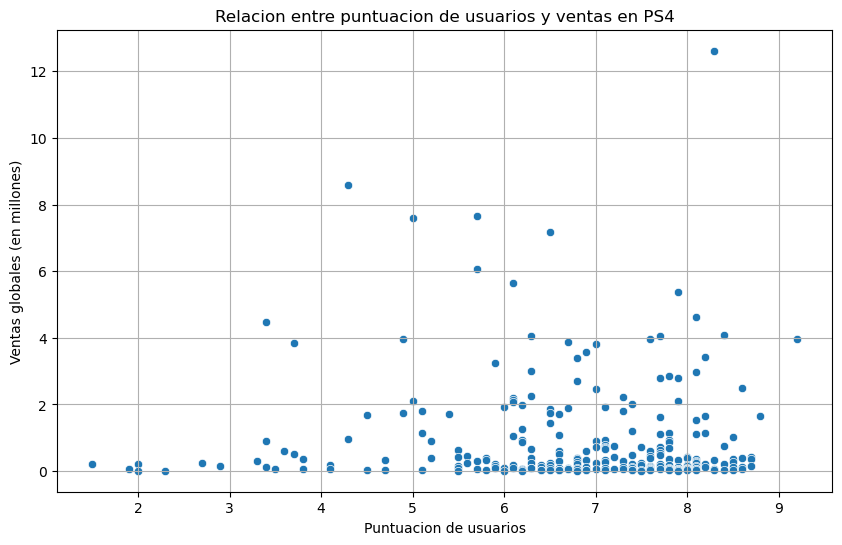



Correlacion entre puntuacion de usuarios y ventas totales:
0.08120167857026463


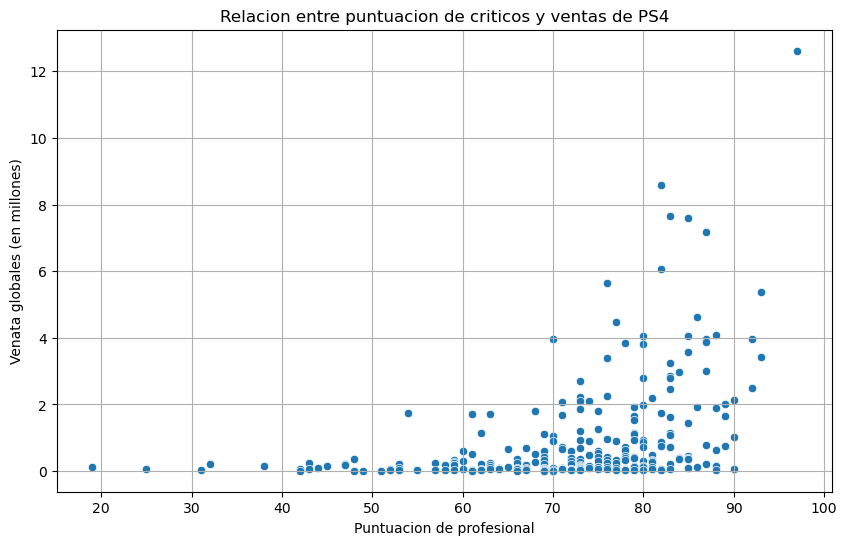

Correlacion entre puntuacion de criticos y ventas totales:
0.23043373766133193


In [14]:

    #3.7Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones
#plataforma de eleccion: PS4
ps4_games = df_important[df_important['platform'] == 'PS4'] #Primero debemos filtar el dataset para tomar la plataforma como variable

#grafico (resenas de usuarios)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ps4_games, x='user_score', y='total_sales')
plt.title('Relacion entre puntuacion de usuarios y ventas en PS4')
plt.xlabel('Puntuacion de usuarios')
plt.ylabel('Ventas globales (en millones)')
plt.grid(True)
plt.show()
print('\n')
#correlacion
print(f'Correlacion entre puntuacion de usuarios y ventas totales:')
print(df_important['user_score'].corr(df_important['total_sales']))

#grafico (resena de profesionales)
plt.figure(figsize=(10,6))
sns.scatterplot(data=ps4_games, x='critic_score',y='total_sales')
plt.title('Relacion entre puntuacion de criticos y ventas de PS4')
plt.xlabel('Puntuacion de profesional')
plt.ylabel('Venata globales (en millones)')
plt.grid(True)
plt.show()
#correlacion
print(f'Correlacion entre puntuacion de criticos y ventas totales:')
print(df_important['critic_score'].corr(df_important['total_sales']))


#Comentario: Tomando en cuenta el coeficiente de correlacion entre la puntuacion de usuario y ventas totales se puede decir que para la plataforma PS4 es baja. Mientras que para la correlaciones entre la puntuacion de los criticos y las ventas es mas fuerte. Lo que puede sugerir que lase resenas de profesionales pueden influir en las decisiones de compra de los consumidores.



platform                      3DS   DC   DS  GBA   GC    PC   PS   PS2   PS3  \
name                                                                           
Enemy Territory: Quake Wars   0.0  0.0  0.0  0.0  0.0  0.01  0.0  0.00  0.34   
Brothers: A Tale of Two Sons  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.00  0.00   
Bulletstorm                   0.0  0.0  0.0  0.0  0.0  0.16  0.0  0.00  0.52   
Crash: Twinsanity             0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.65  0.00   
Goldeneye 007: Reloaded       0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.00  0.78   

platform                       PS4  PSP  PSV  Wii  WiiU  X360    XB  XOne  
name                                                                       
Enemy Territory: Quake Wars   0.00  0.0  0.0  0.0   0.0  0.45  0.00  0.00  
Brothers: A Tale of Two Sons  0.13  0.0  0.0  0.0   0.0  0.00  0.00  0.04  
Bulletstorm                   0.00  0.0  0.0  0.0   0.0  1.02  0.00  0.00  
Crash: Twinsanity             0.00  0.0  0.0  0.0   0.0  

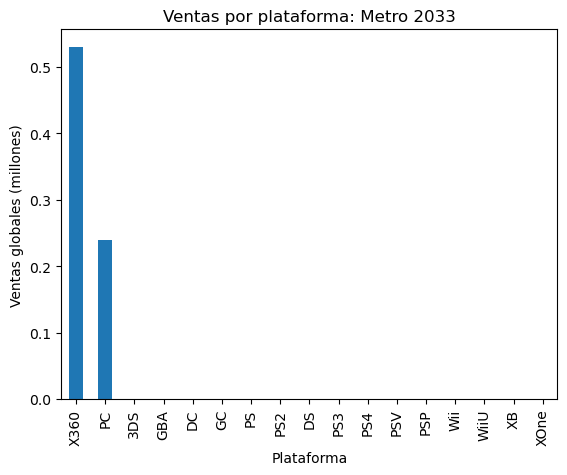

In [15]:

    #3.8 Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
game_counts = df_important['name'].value_counts()# Contar cuantas veces aparece cada juego
multi_platform_games = game_counts[game_counts > 1].index # Filtrar solo los juegos que estan en mas de una plataforma
multi_games_df = df_important[df_important['name'].isin(multi_platform_games)] # Crear un nuevo DataFrame con esos juegos

print('\n')
sales_comparison = multi_games_df.groupby(['name', 'platform'])['total_sales'].sum().unstack().fillna(0)# Agrupar por nombre y plataforma y sumar las ventas
print(sales_comparison.sample(5))

print('\n')

#Visualizar comparacion
juego = 'Metro 2033' #Elegir un juego popular

# Graficar sus ventas por plataforma
sales_comparison.loc[juego].sort_values(ascending=False).plot(kind='bar', title=f'Ventas por plataforma: {juego}',ylabel= 'Ventas globales (millones)', xlabel='Plataforma')
plt.show()


genre
Action          1167.79
Sports           829.53
Shooter          809.77
Role-Playing     466.36
Racing           447.73
Misc             414.81
Platform         365.47
Fighting         232.61
Simulation       201.02
Adventure         80.06
Puzzle            78.58
Strategy          69.49
Name: total_sales, dtype: float64


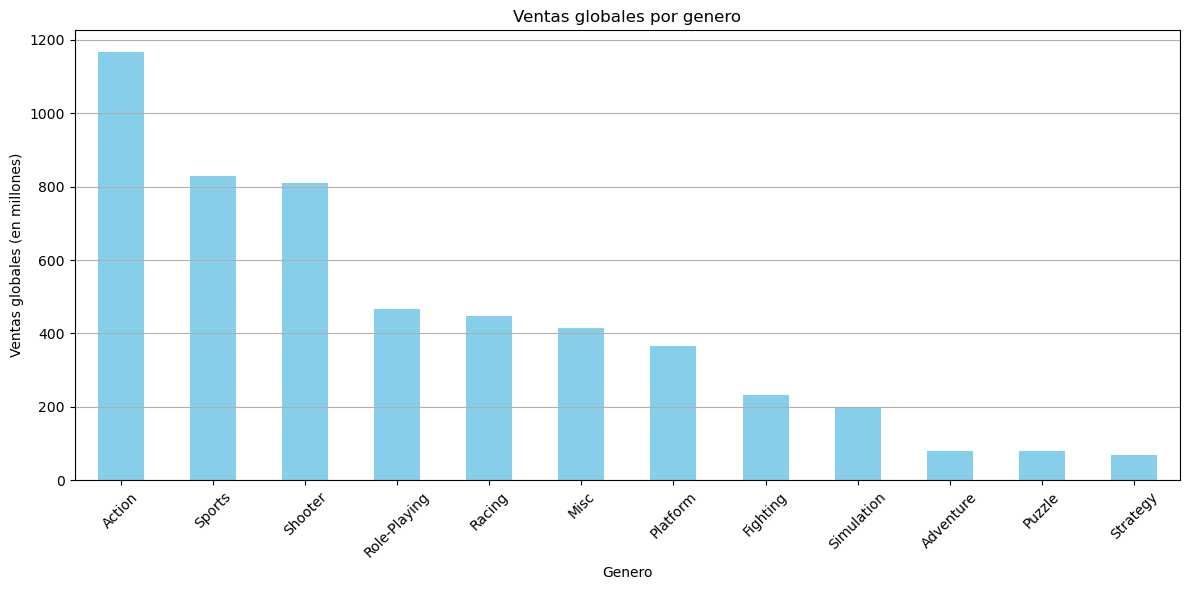



Promedio de ventas por genero: 
genre
Misc            1.080234
Shooter         0.938320
Platform        0.920579
Sports          0.874110
Racing          0.774619
Action          0.715119
Simulation      0.681424
Puzzle          0.677414
Role-Playing    0.671988
Fighting        0.628676
Adventure       0.306743
Strategy        0.255478
Name: total_sales, dtype: float64


In [16]:

    #3.9 Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?
genre_sales = df_important.groupby('genre')['total_sales'].sum().sort_values(ascending=False)#agrupar genero y sumar las ventas totales
print(genre_sales)

# Gráfico de barras
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Ventas globales por genero')
plt.xlabel('Genero')
plt.ylabel('Ventas globales (en millones)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print('\n')
genre_avg_sales = df_important.groupby('genre')['total_sales'].mean().sort_values(ascending=False)# Ventas promedio por juego en cada género
print(f'Promedio de ventas por genero: \n{genre_avg_sales}')



#Comentario: Al sacar  la suma de ventas totales tenemos que el genero 'accion' encabezando la lista debido a la sumatoria de ventas totales del juego, seguido del genero 'Sports'. Estos generos dominan el mercado probablemente por su popularidad entre un publico amplio y su presencia en multiples plataformas. Por otro lado, al calcular el promedio de ventas de los generos de juego  nos arrojo que el genero 'Misc' de primer lugar , seguido de 'shooter' y 'platform'. Por lo tanto, puede indicarnos que a pesar que se lancen menos juegos dentro de estas categoricas pueden significar mayor exito comercial. Por ultimo, generos como 'Adventure' y 'Strategy' muestran ventas bajas y  de igual forma en el promedio.


In [17]:


    #4.1 las 5 principales plataformas segun region

print('\n')
platform_na= df_important.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
platform_eu= df_important.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
platform_jp= df_important.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()


print('\n')


#Comentario:Para saber las principales plataformas de cada region agrupamos  las columnas platform y  las ventas de la region, esta ultima se sometera en una operacion matematica(suma) y ordenar los valores de mayor a menor y asi cvon el parametro head podremos obtener las primeras 5 plataformas con mas ventas.
    
   

In [18]:
 #4.1.2 Describe las variaciones en sus cuotas de mercado de una región a otra

#Comentario: Para calcular las cuotas del mercado de cada region. Primero debemos obtener el total de ventas de cada region. ya una svez determinaro las 5 plataformas  con mas ventas( lo cual se hizo en anteriormente) 
#total de ventas por mercado
total_na = df_important['na_sales'].sum()
total_eu = df_important['eu_sales'].sum()
total_jp = df_important['jp_sales'].sum()

# Cuotas de mercado por región
platform_na_pct = (platform_na / total_na * 100).round(2)
platform_eu_pct = (platform_eu / total_eu * 100).round(2)
platform_jp_pct = (platform_jp / total_jp * 100).round(2)

#
df_na = pd.DataFrame({
    'plataforma_na': platform_na.index,
    'ventas_na': platform_na.values,
    '%_cuotas_mercado_na': platform_na_pct.values
})

df_eu = pd.DataFrame({
    'plataforma_eu': platform_eu.index,
    'ventas_eu': platform_eu.values,
    '%_cuotas_mercado_eu': platform_eu_pct.values
})

df_jp = pd.DataFrame({
    'plataforma_jp': platform_jp.index,
    'ventas_jp': platform_jp.values,
    '%_cuotas_mercado_jp': platform_jp_pct.values
})
print('\n')
display(df_na)
print('\n')
display(df_eu)
print('\n')
display(df_jp)


   

,plataforma_na,ventas_na,%_cuotas_mercado_na
0,X360,533.61,20.30
1,PS2,472.65,17.98
2,Wii,342.91,13.04
3,PS3,341.94,13.01
4,DS,173.52,6.60


,plataforma_eu,ventas_eu,%_cuotas_mercado_eu
0,PS3,273.84,17.41
1,PS2,255.14,16.23
2,X360,234.54,14.92
3,Wii,204.14,12.98
4,PS4,112.44,7.15


,plataforma_jp,ventas_jp,%_cuotas_mercado_jp
0,DS,83.66,20.67
1,PS2,75.81,18.73
2,PS3,54.72,13.52
3,Wii,52.62,13.00
4,3DS,33.87,8.37


#Comentario: Teniendo en cuenta que para calcular las ventas totales de cada region esta comprendido en el periodo de 2000-2016. Por lo tanto, hoy en dia podemos suponer que el PS4 es la plataforma  con mayor cuota en el mercado. Sin embargo, los datos extraidos comprenden desde el 2000 - 2016 . En consecuenta, para la region Norteamerica la plataforma principales son X360,PS2,Wii  y en el caso del X360 en esta region representa un 20% de cuotas en el mercaco. Ens el caro de Europa el PS2, Ps2 y X360 son las tres principales plataformas seguidas del Wii y PS4. PA JApon El DS esta como principal plataforma y ademas tiene un 20% de representacion de cuotas de ventas en el mercado.


In [19]:
 #4.2 Los cinco géneros principales. Explica la diferencia.

genre_na = df_important.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head() # Para obtener los 5 tops de generos de juego por region aplicamos la agrupacion de las columnas 'genre' y ventas de la region. De igual manera, aplicamos la logica de obtener los valores ordenados de mayor a menor y aplicar el atributo head() que nos permitira obtener las primeras 5 filas del dataset
genre_eu = df_important.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
genre_jp = df_important.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

print("Top 5 géneros en Norteamérica:\n", genre_na)
print("\nTop 5 géneros en Europa:\n", genre_eu)
print("\nTop 5 géneros en Japón:\n", genre_jp)
print('\n')
   

Top 5 géneros en Norteamérica:
 genre
Action     574.84
Sports     454.43
Shooter    443.27
Misc       221.87
Racing     212.92
Name: na_sales, dtype: float64

Top 5 géneros en Europa:
 genre
Action     375.75
Shooter    260.21
Sports     247.20
Racing     154.81
Misc       120.95
Name: eu_sales, dtype: float64

Top 5 géneros en Japón:
 genre
Role-Playing    108.78
Action           72.00
Platform         41.14
Sports           33.86
Misc             31.58
Name: jp_sales, dtype: float64




#Comentario:Cada region muestra gustos unicos: NA y EU tienen generos similares liderando, como Action y Sports. Japon se distingue claramente con un fuerte enfasis en Role-Playing y Platform. Esto sugiere que las campanas publicitarias y el desarrollo de videojuegos deben adaptarse al perfil cultural y de consumo de cada mercado.
    

In [20]:
 #4.3 Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

# Agrupar ventas por clasificación ESRB y region
rating_na = df_important.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_eu = df_important.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_jp = df_important.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)


print("Ventas por clasificación ESRB en Norteamérica:\n", rating_na)
print("\nVentas por clasificación ESRB en Europa:\n", rating_eu)
print("\nVentas por clasificación ESRB en Japón:\n", rating_jp)
print('\n')



Ventas por clasificación ESRB en Norteamérica:
 rating
E                    970.51
M                    709.54
T                    659.96
E10+                 286.03
sin clasificacion      1.65
AO                     1.26
RP                     0.00
Name: na_sales, dtype: float64

Ventas por clasificación ESRB en Europa:
 rating
E                    580.54
M                    459.53
T                    371.10
E10+                 155.92
sin clasificacion      4.71
AO                     0.61
RP                     0.03
Name: eu_sales, dtype: float64

Ventas por clasificación ESRB en Japón:
 rating
E                    183.28
T                    125.17
M                     56.54
E10+                  38.81
sin clasificacion      0.89
AO                     0.00
RP                     0.00
Name: jp_sales, dtype: float64




#Comentario:Las clasificaciones E, T y M concentran la mayoria de las ventas tanto en Norteamerica como en Europa, reflejando un mercado generalista que abarca desde jovenes hasta adultos. Japon muestra una tendencia clara hacia juegos mas amigables o para adolescentes, con ventas mucho mas bajas en juegos clasificados como "Mature", lo que puede deberse a diferencias culturales.

In [23]:
 
    #5.1 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC .
#Primero debemos conocer las calificaciones de los usurarios de las plataformas Xbox One y PC lo que debemos realizar obtener estos datos para luego calcular la media:
print('Prueba de hipotesis #1:')
xbox_scores = df_important[df_important['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_important[df_important['platform'] == 'PC']['user_score'].dropna()

print(f"Calificaciones Xbox One: {len(xbox_scores)} registros")
print(f"Calificaciones PC: {len(pc_scores)} registros")
print('\n')

#Comentario:Observamos que las variables tienen tamano de muestra diferentes para continuar realizaremos una prueba Levene para determinar si sus varianzas son iguales o diferentes y luego aplicar la prueba t dependiendo del resultado.

#Prueba Levene
stat, p = levene(xbox_scores, pc_scores)

print('Resultados de la prueba Levene:')
print(f'Estadístico de Levene: {stat:.3f}')
print(f'Valor p: {p:.3f}')
print('\n')

#Comentario: Dado que el valor p es mayor a 0.05 no hay evidencia suficientes para suponer que las varianzas son diferentes. Es decir, con el resultado de la prueba levene podemos realizar la prueba con el parametro equal_var=True.)


result = st.ttest_ind(xbox_scores, pc_scores, equal_var=True) #Ejecutar la prueba t: Realizamos prueba t para muestras independientes usando equal_var=True ya que queremos calcular el promedio de dos poblaciones con varianza similar alpha = 0.05
alpha=0.05
print('Valor p:', result.pvalue)
    if result.pvalue < alpha:
        print('Rechazamos la hipotesis nula')
    else:
        print('No podemos rechazar la hipotesis nula')
print('\n')
print('\n')

#Comentario: H0=Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas. H1= LAs calificaciones promedio delos usuarios de las plataformas Xbox One y Pc son diferentes.Con un valor p de 0.0001, se rechaza la hipotesis nula. Esto indica que las calificaciones promedio de los usuarios en Xbox One y PC no son iguales. La diferencia es estadisticamente significativa, lo que podria sugerir una variacion en la percepcion de los juegos segun la plataforma.


Prueba de hipotesis #1:
Calificaciones Xbox One: 165 registros
Calificaciones PC: 677 registros


Resultados de la prueba Levene:
Estadístico de Levene: 1.420
Valor p: 0.234


Valor p: 0.00014729278086630913
Rechazamos la hipotesis nula






Prueba de Hipótesis: Calificaciones de Usuarios entre Xbox One y PC
Hipótesis planteada:
- H₀ (nula): Las calificaciones promedio de usuarios para Xbox One y PC son iguales.
- H₁ (alternativa): Las calificaciones promedio de usuarios para Xbox One y PC son distintas.
Procedimiento:
- Se extrajeron las puntuaciones de usuario desde el dataset filtrado (df_important), tomando solo los datos desde el año 2000.
- Se aplicó la prueba de Levene para verificar la igualdad de varianzas:
- Resultado: Estadístico = 1.420, p = 0.234
- Conclusión: No se rechaza H₀ → se asume igualdad de varianzas.
- Se aplicó la prueba t para muestras independientes bajo el supuesto de varianzas iguales:
- Resultado:  p = 0.0001
- Conclusión: Se rechaza H₀ → las medias son significativamente diferentes.
Conclusión final:
Con un valor p de 0.0001, se rechaza la hipótesis nula. Esto indica que las calificaciones promedio de los usuarios en Xbox One y PC no son iguales. La diferencia es estadísticamente significativa, lo que podría sugerir una variación en la percepción de los juegos según la plataforma.

In [ ]:

 #5.2Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes 
#Realizamos la extraccion de las calificaciones por genero
print('Prueba de hipotesis #2:')
accion_scores = df_important[df_important['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_important[df_important['genre'] == 'Sports']['user_score'].dropna()
print('Tamano de muestra:')
print(f"Calificaciones en Acción: {len(accion_scores)}") #Verificamos el tamano de muestra
print(f"Calificaciones en Deportes: {len(sports_scores)}")
print('\n')

#Aplicamos la prueba Levene
levene_stat, levene_p = levene(accion_scores, sports_scores)
print('Resultados de prueba Levene:')
print(f"Estadístico de Levene: {levene_stat:.3f}")
print(f"Valor p: {levene_p:.3f}")
print('\n')

#Comentario: Tenemos como resultado que el valor p es mayor a 0.05 . Por lo tanto, la prueba nos indica que las varianzas de ambas poblaciones son similares. Al verificar el tamano de prueba nos encontramos con un patron similar a la anterior prueba de hipotesis, donde los tamanos de muestras eran diferentes pero las varianzas eran similares en ambos grupos.

results=st.ttest_ind(accion_scores, sports_scores,equal_var=True) #Ejecutamos prueba t para 
alpha=0.05
print('Valor p:',results.pvalue)
if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')
#Comentario:No se detecta diferencia significativa entre las calificaciones promedio de los usuarios en los generos Action y Sports. Esto sugiere que, desde la perspectiva del usuario, ambos generos reciben una evaluacion comparable en terminos de calidad o experiencia.


Prueba de Hipótesis: Calificaciones de Usuarios entre los géneros Action y Sports
Hipótesis planteada:
- H₀ (nula): Las calificaciones promedio de usuarios para Action y Sports son iguales.
- H₁ (alternativa): Las calificaciones promedio de usuarios para Action y Sports son distintas.
Procedimiento:
- Se extrajeron los puntajes de usuario de cada género desde el conjunto df_important, filtrando los valores nulos.
- Se aplicó la prueba de Levene para verificar la igualdad de varianzas:
- Valor p = 0.064
⟶ No se rechaza la hipótesis nula → se asume igualdad de varianzas.
- Se realizó una prueba t para muestras independientes con equal_var=True:
- Valor p = 0.939
⟶ No se rechaza la hipótesis nula.
Conclusión estadística:
No se observa una diferencia significativa entre las calificaciones promedio de los usuarios para videojuegos de los géneros Acción y Deportes. El valor p de la prueba t (0.939) indica que las medias son estadísticamente similares.
